In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import yfinance as yf
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
# # Create SQLAlchemy engine
engine = create_engine("mysql+pymysql://root:@localhost/options")

In [45]:
# Define stock ticker symbol and date range
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2024-01-01"
end_date = "2024-12-31"

# Fetch historical stock data
appleStockPrices = yf.download(ticker, start=start_date, end=end_date)
appleStockPrices.columns = [col[0] for col in appleStockPrices.columns.values]

# The index is date, change to column
appleStockPrices.reset_index(inplace=True)
appleStockPrices.to_csv("appleStockPrices.csv", index=False)

[*********************100%***********************]  1 of 1 completed

Strategy:

Sell put at 5% below current price expiring in 1 - 2 weeks.

If assigned, sell call at 5% above current price in 1-2 weeks.

If assigned, sell put, and so on.


In [9]:
def getFilterdOptionsData(date=None, act_symbol=None, expiration=None, strike=None,
                           call_put=None, bid_range=None, ask_range=None, vol_range=None,
                           delta_range=None, gamma_range=None, theta_range=None, vega_range=None, rho_range=None,
                           con=engine):
    query = "SELECT * FROM option_chain WHERE 1=1"
    params = []

    if date:
        if isinstance(date, tuple):
            query += " AND date BETWEEN %s AND %s"
            params.extend(date)
        else:
            query += " AND date = %s"
            params.append(date)
    if act_symbol:
        query += " AND act_symbol = %s"
        params.append(act_symbol)
    if expiration:
        if isinstance(expiration, tuple):
            query += " AND expiration BETWEEN %s AND %s"
            params.extend(expiration)
        else:
            query += " AND expiration = %s"
            params.append(expiration)
    if strike:
        if isinstance(strike, tuple):
            query += " AND strike BETWEEN %s AND %s"
            params.extend(strike)
        else:
            query += " AND strike = %s"
            params.append(strike)
    if call_put:
        query += " AND call_put = %s"
        params.append(call_put)
    if bid_range:
        query += " AND bid BETWEEN %s AND %s"
        params.extend(bid_range)
    if ask_range:
        query += " AND ask BETWEEN %s AND %s"
        params.extend(ask_range)
    if vol_range:
        query += " AND vol BETWEEN %s AND %s"
        params.extend(vol_range)
    if delta_range:
        query += " AND delta BETWEEN %s AND %s"
        params.extend(delta_range)
    if gamma_range:
        query += " AND gamma BETWEEN %s AND %s"
        params.extend(gamma_range)
    if theta_range:
        query += " AND theta BETWEEN %s AND %s"
        params.extend(theta_range)
    if vega_range:
        query += " AND vega BETWEEN %s AND %s"
        params.extend(vega_range)
    if rho_range:
        query += " AND rho BETWEEN %s AND %s"
        params.extend(rho_range)

    df = pd.read_sql(query, con, params=tuple(params))
    return df

In [ ]:
allSymbols = pd.read_sql("SELECT DISTINCT act_symbol FROM option_chain", engine)
allSymbols = allSymbols["act_symbol"].tolist()
allSymbols

# Get apple options data for dates in 2024.

commented out to prevent re-run

In [2]:
beginDate = "2024-01-01"
endDate = "2024-12-31"

# Example usage
# Fetch options data for a specific date and symbol
# appleCalls = getFilterdOptionsData(date=(beginDate, endDate), act_symbol="AAPL", call_put="call")
# applePuts = getFilterdOptionsData(date=(beginDate, endDate), act_symbol="AAPL", call_put="put")

In [3]:
applePuts = pd.read_csv("applePuts.csv")
applePuts['days_to_expiration'] = (pd.to_datetime(applePuts['expiration']) - pd.to_datetime(applePuts['date'])).dt.days.astype(int)
appleCalls = pd.read_csv("appleCalls.csv")
appleCalls['days_to_expiration'] = (pd.to_datetime(appleCalls['expiration']) - pd.to_datetime(appleCalls['date'])).dt.days.astype(int)
appleStockPrices = pd.read_csv("appleStockPrices.csv")


In [49]:
# round the values to 3 decimals for stock prices
appleStockPrices = appleStockPrices.round(2)

In [88]:
exampleCall = appleCalls[appleCalls.date == "2024-01-03"]
exampleCall = exampleCall[exampleCall.expiration == "2024-01-19"]
stockPrice = appleStockPrices[appleStockPrices.Date == "2024-01-03"]

In [89]:
exampleCall

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho,days_to_expiration
75,2024-01-03,AAPL,2024-01-19,130.0,Call,54.50,54.75,0.7068,0.9928,0.0007,-0.0360,0.0077,0.0562,16 days
76,2024-01-03,AAPL,2024-01-19,135.0,Call,49.50,49.95,0.7155,0.9849,0.0013,-0.0523,0.0146,0.0577,16 days
77,2024-01-03,AAPL,2024-01-19,140.0,Call,44.45,44.80,0.5420,0.9937,0.0008,-0.0320,0.0067,0.0606,16 days
78,2024-01-03,AAPL,2024-01-19,145.0,Call,39.50,39.95,0.5570,0.9835,0.0019,-0.0485,0.0158,0.0619,16 days
79,2024-01-03,AAPL,2024-01-19,150.0,Call,34.55,35.00,0.5088,0.9775,0.0027,-0.0542,0.0205,0.0636,16 days
80,2024-01-03,AAPL,2024-01-19,155.0,Call,29.55,30.00,0.4345,0.9757,0.0034,-0.0521,0.0219,0.0657,16 days
81,2024-01-03,AAPL,2024-01-19,160.0,Call,24.60,25.05,0.3812,0.9669,0.0050,-0.0565,0.0284,0.0671,16 days
82,2024-01-03,AAPL,2024-01-19,165.0,Call,19.70,20.10,0.3301,0.9521,0.0078,-0.0626,0.0384,0.0681,16 days
83,2024-01-03,AAPL,2024-01-19,170.0,Call,14.85,15.15,0.2761,0.9282,0.0128,-0.0686,0.0527,0.0683,16 days
84,2024-01-03,AAPL,2024-01-19,172.5,Call,12.45,12.65,0.2454,0.9121,0.0168,-0.0702,0.0614,0.0681,16 days


In [116]:
def linePlotRelationship(df, x, y, title=None, currentPrice=None, scatter=False):
    plt.figure(figsize=(10, 6))
    if scatter:
        sns.scatterplot(data=df, x=x, y=y)
    else:
        sns.lineplot(data=df, x=x, y=y)
    if currentPrice:
        plt.axvline(x=currentPrice, color='r', linestyle='--', label='Current Price')
        plt.legend()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

In [ ]:
pairs = [
    ('strike', 'delta'),
    ('strike', 'gamma'),
    ('strike', 'theta'),
    ('strike', 'vega'),
    ('strike', 'rho'),
    ('strike', 'bid'),
    ('strike', 'ask')
]
for pair in pairs:
    linePlotRelationship(exampleCall, pair[0], pair[1], f"Relationship between {pair[0]} and {pair[1]} for Call Options",
                         currentPrice=stockPrice['Open'].values[0])


In [ ]:
pairs = [
    ('vol', 'delta'),
    ('vol', 'gamma'),
    ('vol', 'theta'),
    ('vol', 'vega'),
    ('vol', 'rho'),
    ('vol', 'bid')
]

for pair in pairs:
    linePlotRelationship(exampleCall, pair[0], pair[1], f"Relationship between {pair[0]} and {pair[1]} for Call Options", scatter=True,)

In [108]:
# log the following values for each day:
# "date",
# "action",
# "putPosition",
# "callPosition",
# "stockPosition",
# "cashChange",
# "cash",
# "stockPrice",
# "portfolioValue"
def selectOption(options,
                 stock_price,
                 minDaysToExpiration=15,
                 maxDaysToExpiration=30,
                 deltaRange=None,
                 pctBelowCurrentPrice=None,
                 pctAboveCurrentPrice=None):
    options = options[
        (options['days_to_expiration'] >= minDaysToExpiration) &
        (options['days_to_expiration'] <= maxDaysToExpiration)
    ]
    if options.empty:
        return None

    if deltaRange:
        options = options[
            (options['delta'] >= deltaRange[0]) &
            (options['delta'] <= deltaRange[1])
        ]

    if pctBelowCurrentPrice:
        options = options[
            (options['strike'] <= stock_price * (1 - pctBelowCurrentPrice))
        ]
    if pctAboveCurrentPrice:
        options = options[
            (options['strike'] >= stock_price * (1 + pctAboveCurrentPrice))
        ]
    if options.empty:
        return None

    return options
def testOptionWheel(stockPrices,
                    callOptions,
                    putOptions,
                    minDaysToExpiration=15,
                    maxDaysToExpiration=30,
                    putDeltaRange=(-0.4, -0.2),
                    callDeltaRange=(0.2, 0.4)):
    tradeLog = []
    putPosition = 0
    cash = 20_000
    callPosition = 0
    stockPosition = 0
    expiration = None

    for dailyStock in stockPrices.iterrows():
        date = dailyStock[1]['Date']
        openPrice = dailyStock[1]['Open']
        closePrice = dailyStock[1]['Close']
        highPrice = dailyStock[1]['High']
        lowPrice = dailyStock[1]['Low']
        callOptionsForDate = callOptions[callOptions.date == date]
        putOptionsForDate = putOptions[putOptions.date == date]

        if callOptionsForDate.empty or putOptionsForDate.empty:
            continue

        action = "hold"
        cashChange = 0

        if expiration and date >= expiration:
            if callPosition == 1:
                if closePrice >= strikePrice:
                    action = "assigned call"
                    cashChange = strikePrice * 100
                    cash += cashChange
                    stockPosition -= 100
                else:
                    action = "call expired"
                callPosition = 0

            elif putPosition == 1:
                if closePrice <= strikePrice:
                    action = "assigned put"
                    cash -= strikePrice * 100
                    stockPosition += 100
                else:
                    action = "put expired"
                putPosition = 0

            tradeLog.append({
                "date": date,
                "action": action,
                "putPosition": putPosition,
                "callPosition": callPosition,
                "stockPosition": stockPosition,
                "cashChange": cashChange,
                "cash": cash,
                "stockPrice": closePrice,
                "portfolioValue": portfolioValue
            })

            expiration = None
            continue

        if (putPosition == 0 and callPosition == 0 and stockPosition == 0):
            putOptionsForDate = selectOption(
                putOptionsForDate,
                openPrice,
                minDaysToExpiration=minDaysToExpiration,
                maxDaysToExpiration=maxDaysToExpiration,
                deltaRange=putDeltaRange,
            )

            if putOptionsForDate is not None:
                idxMaxBid = putOptionsForDate['bid'].idxmax()
                maxBidPut = putOptionsForDate.loc[idxMaxBid]
                putPosition = 1
                strikePrice = maxBidPut['strike']
                expiration = maxBidPut['expiration']
                putPremium = maxBidPut['bid'] * 100
                cash += putPremium
                cashChange = putPremium
                action = f"sell {strikePrice} {expiration} put"

        if stockPosition > 0 and putPosition == 0 and callPosition == 0:
            callOptionsForDate = selectOption(
                callOptionsForDate,
                openPrice,
                minDaysToExpiration=minDaysToExpiration,
                maxDaysToExpiration=maxDaysToExpiration,
                deltaRange=callDeltaRange,
            )

            if callOptionsForDate is not None:
                idxMaxBid = callOptionsForDate['bid'].idxmax()
                maxBidCall = callOptionsForDate.loc[idxMaxBid]
                callPosition = 1
                strikePrice = maxBidCall['strike']
                expiration = maxBidCall['expiration']
                callPremium = maxBidCall['bid'] * 100
                cashChange = callPremium
                cash += callPremium
                action = f"sell {strikePrice} {expiration} call"

        portfolioValue = cash + stockPosition * closePrice
        tradeLog.append({
            "date": date,
            "action": action,
            "putPosition": putPosition,
            "callPosition": callPosition,
            "stockPosition": stockPosition,
            "cashChange": cashChange,
            "cash": cash,
            "stockPrice": closePrice,
            "portfolioValue": portfolioValue
        })

    tradeLog = pd.DataFrame(tradeLog)
    return tradeLog




In [110]:
tradeLog = testOptionWheel(
    appleStockPrices,
    appleCalls,
    applePuts,
    minDaysToExpiration=15,
    maxDaysToExpiration=30,
    putDeltaRange=(-0.4, -0.2),
    callDeltaRange=(0.2, 0.4),
)
tradeLog

,date,action,putPosition,callPosition,stockPosition,cashChange,cash,stockPrice,portfolioValue
0,2024-01-03,sell 180.0 2024-02-02 put,1,0,0,284.0,20284.0,183.150391,20284.0
1,2024-01-05,hold,1,0,0,0.0,20284.0,180.098694,20284.0
2,2024-01-08,hold,1,0,0,0.0,20284.0,184.452560,20284.0
3,2024-01-10,hold,1,0,0,0.0,20284.0,185.078796,20284.0
4,2024-01-12,hold,1,0,0,0.0,20284.0,184.810410,20284.0
...,...,...,...,...,...,...,...,...,...
167,2024-12-20,hold,1,0,0,0.0,22812.0,254.210510,22812.0
168,2024-12-23,hold,1,0,0,0.0,22812.0,254.989655,22812.0
169,2024-12-24,hold,1,0,0,0.0,22812.0,257.916443,22812.0
170,2024-12-27,hold,1,0,0,0.0,22812.0,255.309296,22812.0


In [100]:
justHold100Stocks = tradeLog[["date", "stockPrice"]].copy()
day1Cash = 20_000 - 100 * justHold100Stocks["stockPrice"].iloc[0]
justHold100Stocks["portfolioValue"] = justHold100Stocks["stockPrice"] * 100 + day1Cash
justHold100Stocks

,date,stockPrice,portfolioValue
0,2024-01-03,183.150391,20000.000000
1,2024-01-05,180.098694,19694.830322
2,2024-01-08,184.452560,20130.216980
3,2024-01-10,185.078796,20192.840576
4,2024-01-12,184.810410,20166.001892
...,...,...,...
167,2024-12-20,254.210510,27106.011963
168,2024-12-23,254.989655,27183.926392
169,2024-12-24,257.916443,27476.605225
170,2024-12-27,255.309296,27215.890503


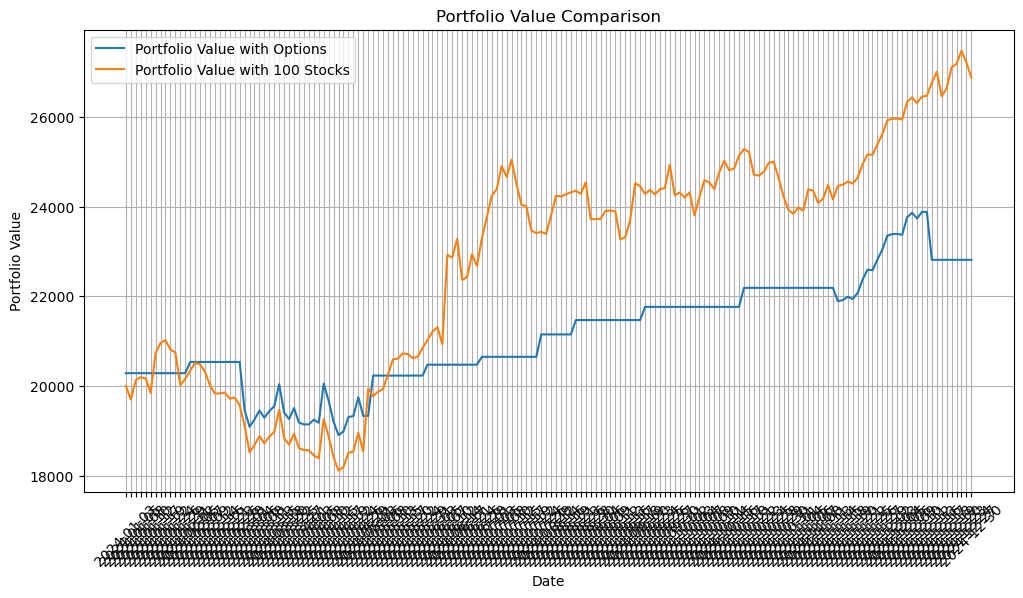

In [ ]:
# plot portfolio values of both strategies
plt.figure(figsize=(12, 6))
plt.plot(tradeLog['date'], tradeLog['portfolioValue'], label='Portfolio Value with Options')
plt.plot(justHold100Stocks['date'], justHold100Stocks['portfolioValue'], label='Portfolio Value with 100 Stocks')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

In [120]:
putDeltaRanges = [
    (-0.7, -0.6),
    (-0.6, -0.5),
    (-0.5, -0.4),
    (-0.4, -0.3),
    (-0.3, -0.2),
]
callDeltaRanges = [
    (0.2, 0.3),
    (0.3, 0.4),
    (0.4, 0.5),
    (0.5, 0.6),
    (0.6, 0.7),
]
tradeLogs = []

import plotly.express as px
import pandas as pd

# Store results for all delta range pairs
allTradeLogs = []

for putIndex, putDeltaRange in enumerate(putDeltaRanges):
    for callIndex, callDeltaRange in enumerate(callDeltaRanges):
        tradeLog = testOptionWheel(
            appleStockPrices,
            appleCalls,
            applePuts,
            minDaysToExpiration=15,
            maxDaysToExpiration=30,
            putDeltaRange=putDeltaRange,
            callDeltaRange=callDeltaRange,
        )

        # Add metadata for labeling
        tradeLog["putDeltaRange"] = str(putDeltaRange)
        tradeLog["callDeltaRange"] = str(callDeltaRange)
        tradeLog["deltaLabel"] = f"Put: {putDeltaRange}, Call: {callDeltaRange}"  # Combine for legend
        allTradeLogs.append(tradeLog)

# Combine all trade logs into a single DataFrame for visualization
combinedTradeLogs = pd.concat(allTradeLogs, ignore_index=True)

# Create interactive Plotly figure
fig = px.line(
    combinedTradeLogs,
    x="date",
    y="portfolioValue",
    color="deltaLabel",  # Use combined put + call delta range as legend
    hover_data={
        "putDeltaRange": True,
        "callDeltaRange": True,
        "portfolioValue": True,
        "date": True,
    },
    title="Portfolio Value Comparison for Different Put & Call Delta Ranges"
)

# Set legend title for clarity
fig.update_layout(
    legend_title_text="Delta Ranges (Put, Call)",
    legend=dict(
        yanchor="top",
        y=1.02,
        xanchor="left",
        x=0.01
    )
)

# Customize hover tooltip
fig.update_traces(
    hovertemplate="<b>Date:</b> %{x}<br>"
                  "<b>Portfolio Value:</b> %{y}<br>"
                  "<b>Put Delta Range:</b> %{customdata[0]}<br>"
                  "<b>Call Delta Range:</b> %{customdata[1]}"
)

# Show interactive plot with legend toggling
fig.show()

In [124]:
bestTradeLog = [tradeLog for tradeLog in allTradeLogs if tradeLog["putDeltaRange"][0] == "(-0.5, -0.4)" and tradeLog["callDeltaRange"][0] == "(0.4, 0.5)"][0]

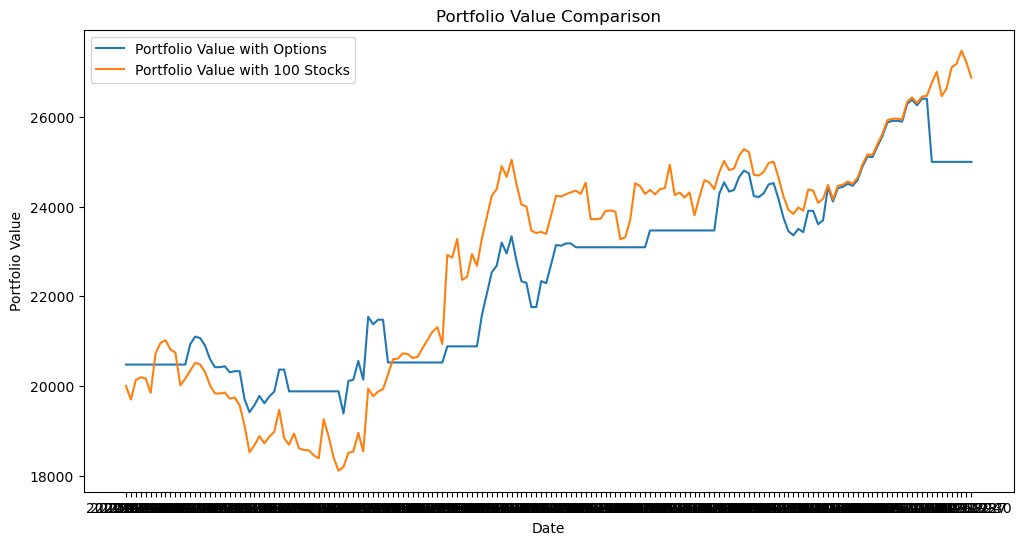

In [125]:
# plot the best trade log and the justHold100Stocks
plt.figure(figsize=(12, 6))
plt.plot(bestTradeLog['date'], bestTradeLog['portfolioValue'], label='Portfolio Value with Options')
plt.plot(justHold100Stocks['date'], justHold100Stocks['portfolioValue'], label='Portfolio Value with 100 Stocks')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Comparison')
plt.legend()